# ĐỒ ÁN THỰC HÀNH: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## Chủ đề: **120 years of Olympic history: athletes and results**
- Môn học: Lập Trình Cho Khoa Học Dữ Liệu
- Nhóm: 6

## 1. Thu thập dữ liệu

Đây là bộ dữ liệu lịch sử về Thế vận hội Olympic hiện đại, bao gồm tất cả các Thế vận hội từ Athens 1896 đến Rio 2016.
Lưu ý rằng Thế vận hội Mùa đông và Mùa hè được tổ chức trong cùng một năm cho đến năm 1992. Sau đó, họ mới xen kẽ chúng (2 năm/lần): Thế vận hội Mùa đông diễn ra năm 1994, sau đó là Mùa hè năm 1996, rồi Mùa đông năm 1998, v.v. . Một sai lầm phổ biến mà mọi người mắc phải khi phân tích dữ liệu này là cho rằng Thế vận hội Mùa hè và Mùa đông luôn luôn được sắp xếp xen kẽ.

Link dataset: `https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results`

License: CC0: Public Domain (không có bản quyền, cho phép mọi người có thể sao chép, sửa đổi, phân phối hay ngay cả sử dụng với mục đích thương mại mà không cần phải xin phép).

Cách thu thập dữ liệu: Tác giả đã sử dụng R để cào dữ liệu từ website `www.sports-reference.com` vào tháng 5/2018. Dữ liệu của website là kết quả 1 cuộc nghiên cứu quy mô lớn của 1 nhóm những người đam mê lịch sử Thế vận hội và những người tự xưng mình là 'nhà thống kê'.

## 2. Khám phá dữ liệu

### Import các thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

import warnings
warnings.simplefilter('ignore')


#!pip install pycountry
import pycountry

from scipy import stats

### Đọc dữ liệu từ file csv vào dataframe

File `athlete_events.csv` cho biết những thông tin về các vận động viên đã tham gia Olympics.

In [2]:
ethlete_df = pd.read_csv('dataset/athlete_events.csv')
ethlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


File `noc_regions.csv` cho biết mỗi mã NOC (National Olympic Committees - Đoàn đại biểu Uỷ ban Olympic quốc gia) sẽ tương ứng với vùng lãnh thổ nào và những ghi chú (nếu có).

In [3]:
noc_df = pd.read_csv('dataset/noc_regions.csv')
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Để thuận lợi cho việc thao tác với dữ liệu, ta sẽ tiến hành gộp 2 dataframe thông qua cột chung là NOC:

In [4]:
ethlete_df = ethlete_df.merge(noc_df, on = 'NOC', how = 'left')
ethlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột và lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [5]:
num_rows, num_cols = ethlete_df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  271116
Num cols:  17


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của trang web `www.sports-reference.com` và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một vận động viên tham gia Thế vận hội Mùa đông và Mùa hè.

### Dữ liệu có các dòng bị lặp không? Nếu có, xử lý những dòng bị lặp

Ta sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [6]:
have_duplicated_rows = ethlete_df.duplicated().sum() > 0
have_duplicated_rows

True

Kết quả kiểm tra cho thấy dữ liệu có dòng bị trùng lắp, do đó ta cần phải loại bỏ những dòng lặp đó đi.

In [7]:
ethlete_df.drop_duplicates(inplace = True)
ethlete_df.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của trang web `www.sports-reference.com` về các cột trong file "ethlete_event.csv":
- **ID**: Chỉ số duy nhất cho mỗi vận động viên.
- **Name**: Tên của vận động viên.
- **Sex**: Giới tính của vận động viên.
- **Age**: Tuổi của vận động viên .
- **Height**: Chiều cao của vận động viên.
- **Weight**: Cân nặng của vận động viên.
- **Team**: Tên đội của vận động viên.
- **NOC**: Ủy ban Olympic quốc gia.
- **Games**: Tên của Thế vận hội mà vận động viên tham dự.
- **Year**: Năm tổ chức Thế vận hội.
- **Season**: Mùa tổ chức Thế vận hội.
- **City**: Thành phố tổ chức Thế vận hội.
- **Sport**: Môn thi đấu của vận động viên.
- **Event**: Nội dung thi đấu của vận động viên.
- **Medal**: Huy chương vận động viên đạt được.
- **region**: Quốc tịch của vận động viên.
- **notes**: Ghi chú.

### Loại bỏ các cột không cần thiết, cột chứa nhiều dữ liệu trống.

Ta tính tỉ lệ phần trăm các giá trị bị thiếu trong các cột để chọn ra những cột có tỉ lệ giá trị bị thiếu lớn và loại bỏ.

In [8]:
per_null = dict(ethlete_df.isnull().sum() / num_rows)
per_null

{'ID': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 0.03435798698711991,
 'Height': 0.21693297333982503,
 'Weight': 0.22693976010268668,
 'Team': 0.0,
 'NOC': 0.0,
 'Games': 0.0,
 'Year': 0.0,
 'Season': 0.0,
 'City': 0.0,
 'Sport': 0.0,
 'Event': 0.0,
 'Medal': 0.8481941309255079,
 'region': 0.0013647294884846339,
 'notes': 0.9763200991457531}

Ta thấy cột **notes** có tỉ lệ giá trị thiếu rất lớn và cột này cũng thật sự không cần thiết trong việc phân tích dữ liệu nên ta sẽ bỏ nó.

In [9]:
ethlete_df.drop('notes', axis = 1, inplace = True)
num_cols = ethlete_df.shape[1]
print("Num cols: ", num_cols)
ethlete_df.columns

Num cols:  16


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta lấy dtype (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong dữ liệu và lưu kết quả vào series col_dtypes; series này có index là tên cột.

In [10]:
col_dtypes = ethlete_df.dtypes
col_dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Hiện tại, ta đang có 5 cột numeric có vẻ thuộc nhóm numeric là: "ID", "Age", "Height", "Weight", "Year". Tuy nhiên, cột "ID" thật ra lại là dạng categorical (vì ID là mã được đánh dưới dạng số). Như vậy, chỉ có 4 cột numeric là "Age", "Height","Year" và "Weight".

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả sẽ được lưu vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max" và có 4 cột là "Age", "Height", "Year" , "Weight".

In [11]:
nume_col_df = ethlete_df[["Age", "Height", "Year" , "Weight"]]

data = {"missing_ratio": nume_col_df.isna().mean().round(3) * 100,
        "min": nume_col_df.min(),
        "max": nume_col_df.max()}

nume_col_profiles_df = pd.DataFrame(data).T

nume_col_profiles_df

,Age,Height,Year,Weight
missing_ratio,3.5,21.8,0.0,22.8
min,10.0,127.0,1896.0,25.0
max,97.0,226.0,2016.0,214.0


- Nhìn vào độ tuổi lớn nhất và nhỏ nhất, ta nhận thấy có một vài vận động viên rất 'đặc biệt'.
- Có những vận động viên có thể đạt đến chiều cao và cân nặng kỷ lục !
- Nhìn vào min, max của Year ta có thể thấy dữ liệu được thu thập từ năm 1896 đến 2016, đúng như mô tả ban đầu.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 12 cột categorical là: "ID", "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event", "Medal", "region".

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list các giá trị khác nhau (không xét giá trị thiếu). Ta lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals" và có 12 cột là "ID", "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event", "Medal", "region".

In [12]:
cate_col_df = ethlete_df[["ID", "Name", "Sex", "Team", "NOC", "Games",\
                          "Season", "City", "Sport", "Event", "Medal", "region"]]
cate_col_profiles_dict = {}

missing_ratio = cate_col_df.apply(lambda x: x.isna().mean().round(3)*100, axis = 0)
diff_vals = cate_col_df.apply(lambda x: list(x.value_counts(dropna=True).index), axis = 0)
num_diff_vals = diff_vals.apply(len)

cate_col_profiles_df = pd.DataFrame([missing_ratio, num_diff_vals, diff_vals] \
                                    , index = ["missing_ratio", "num_diff_vals", "diff_vals"] )
cate_col_profiles_df

,ID,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,region
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.3,0.1
num_diff_vals,135571,134732,2,1184,230,51,2,42,66,765,3,205
diff_vals,"[106296, 115354, 119591, 129196, 119590, 89187...","[Heikki Ilmari Savolainen, Joseph ""Josy"" Stoff...","[M, F]","[United States, France, Great Britain, Italy, ...","[USA, FRA, GBR, ITA, GER, CAN, JPN, SWE, AUS, ...","[2000 Summer, 1996 Summer, 2016 Summer, 2008 S...","[Summer, Winter]","[London, Athina, Sydney, Atlanta, Rio de Janei...","[Athletics, Gymnastics, Swimming, Shooting, Cy...","[Football Men's Football, Ice Hockey Men's Ice...","[Gold, Bronze, Silver]","[USA, Germany, France, UK, Russia, Italy, Cana..."


Có vẻ như không có gì bất thường

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất được quốc gia mình nhiều năm cử đi đại 
        diện tham gia Thế vận hội. Có thể, ban tổ chức sẽ có một giải thưởng là "Tuyên dương những vận động viên có số lần 
        tham gia nhiều nhất lịch sử" và họ sẽ được nhiều người đời sau biết đến.

- Top 5 vận động viên đạt nhiều huy chương nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những vận động viên xuất sắc nhất đã giành được nhiều huy chương về cho quốc gia mình. Đó là những vận động viên đã làm rạng danh đất nước, xứng đáng trở thành huyền thoại của đất nước đó nói riêng và của các kỳ Olympics nói chung.


- Quốc gia có thành tích tốt nhất qua các kỳ Olympic mùa hè?
    
        Ý nghĩa: Với câu hỏi trên, ta có thể biết được những quốc gia có thành tích tốt nhất cho đến năm 2016. Những quốc gia đó đã cho thấy khả năng thể chất tuyệt vời, khẳng định được sức mạnh và vị thế thể thao của mình trên sân chơi quốc tế.
        
- Thành tích của Thể thao Việt Nam trong lịch sử tham dự Olympic?
    
        Ý nghĩa: Với câu hỏi trên, ta biết được thành tích của thể thao Việt Nam ở sân chơi Olympic để có thể tự hào và từ đó phấn đấu để đạt được nhiều huy chương hơn, xứng danh đất nước Con Rồng cháu Tiên.
        
- Trong một thế vận hội: ai là người tham gia thi nhiều nội dung nhất, ai là người giành nhiều huy chương nhất?
    
        Ý nghĩa: Với câu hỏi trên, ta biết được:
        - Kỷ lục về số nội dung thi của một vận động viên trong một thế vận hội.
        - Kỷ lục về số huy chương đạt được của một vận động viên trong một thế vận hội.
        Những kỷ lục trên nhằm vinh danh những vận động viên đã cống hiến hết mình cho thể thao, là tấm gương sáng để các thế hệ vận động viên sau này noi theo và cố gắng để phá vỡ kỷ lục.
        
- Trong những năm gần đây (từ khi Olympic mùa hè và mùa đông bắt đầu xen kẽ nhau), mỗi quốc gia đăng cai tổ chức liệu có lợi thế chủ nhà hay không ?
    
        Ý nghĩa: Lợi thế chủ nhà là khi một quốc gia đăng cai có nhiều điều kiện thuận lợi hơn so với các nước khác (do nhiều yếu tố như cổ động viên, sự thích nghi khí hậu, không cần di chuyển xa, luật lệ nước chủ nhà...). Với lợi thế đó, ta sẽ xem liệu nước chủ nhà ở các kì Olympic có tận dụng được hay không. Để tiện cho việc thống kê, ta sẽ xét từ năm 1994, khi mỗi năm chỉ có đúng 1 kì Olympic.
        
- Mối quan hệ giữa số nội dung tham gia và số huy chương đạt được của mỗi quốc gia qua các kỳ thế vận hội?

        Ý nghĩa: Với câu hỏi trên, nếu trả lời được sẽ giúp ích cho việc dự đoán số huy chương đạt được của mỗi quốc gia trước mỗi kỳ thế vận hội.

## 4. Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

## Tiền xử lý

Để dễ dàng hơn trong việc tính số lượng huy chương, ta sẽ tạo thêm cột isWon để lưu giá trị xem vận động viên có giành được huy chương hay không, nếu có thì `isWon` sẽ có giá trị là 1, ngược lại là 0.

In [13]:
ethlete_df['isWon'] = np.where(ethlete_df['Medal'].isna(), 0, 1)
ethlete_df['isWon'] = ethlete_df['isWon'].astype(bool)

### 4.1. Top 5 vận động viên tham gia nhiều năm Thế vận hội nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng năm Thế vận hội mà mỗi vận động viên tham gia, chọn ra top 5 người có số lượng tham gia nhiều nhất. Ta lưu kết quả vào series `num_year_participate`, trong đó index là tên vận động viên.
- Bước 2: Từ kết quả ở trên, ta vẽ đồ thị dạng cột, trong đó trục hoành là tên và trục tung là số lượng năm tham gia.Ta đặt tên trục hoành là "Year" và tên trục tung là "Nums_part".

Tính số lượng năm Thế vận hội mà mỗi vận động viên tham gia, chọn ra top 5 người có số lượng tham gia nhiều nhất. Ta lưu kết quả vào series `num_year_participate`, trong đó index là tên vận động viên.

In [14]:
years_part = ethlete_df.groupby(['Name',ethlete_df['Year']]).size()
years_part = years_part.reset_index()
years_part = years_part.groupby('Name').size()
years_part = years_part.reset_index()
num_year_participate = years_part.sort_values(by = [0], ascending = False).head()
display(num_year_participate)

,Name,0
50684,Ian Millar,10
50177,Hubert Raudaschl,9
1465,Afanasijs Kuzmins,9
74851,Lesley Allison Thompson-Willie,8
94058,Nino Salukvadze (-Machavariani),8


Từ kết quả ở trên, ta vẽ đồ thị dạng cột, trong đó trục hoành là tên và trục tung là số lượng năm tham gia.Ta đặt tên trục hoành là "Year" và tên trục tung là "Nums_part".

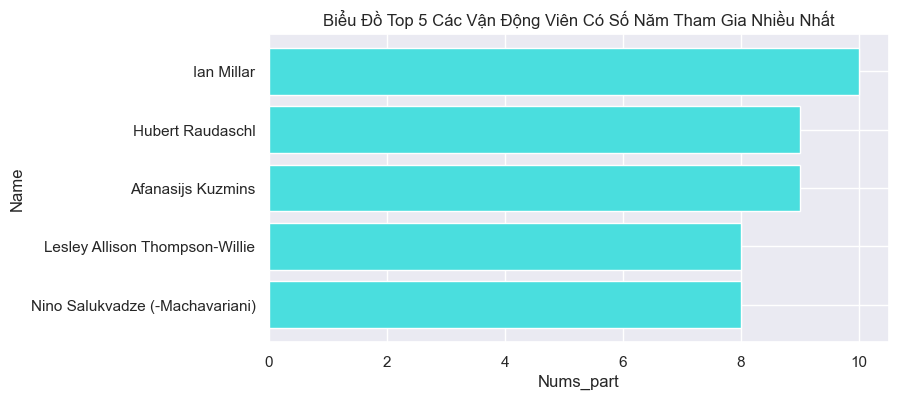

In [15]:
plt.figure(figsize = (8, 4))
ax = plt.barh(num_year_participate['Name'], num_year_participate[0], color = "#4ADEDE")
plt.xlabel('Nums_part')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Năm Tham Gia Nhiều Nhất')
plt.gca().invert_yaxis()
plt.show()

### 4.2. Top 5 vận động viên đạt nhiều huy chương nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng huy chương theo từng loại Gold, Silver, Bronze của các vận động viên. Chọn ra top 5 người có tổng số huy chương nhiều nhất. Ta lưu kết quả vào series `num_medal_reward`.
- Bước 2: Từ kết quả ở trên, ta vẽ group stack bar chart, trong đó trục hoành là tên và trục tung là số lượng huy chương.Ta đặt tên trục hoành là "Name" và tên trục tung là "Nums_medal".

Tính số lượng huy chương theo từng loại Gold, Silver, Bronze của các vận động viên. Chọn ra top 5 người có tổng số huy chương nhiều nhất. Ta lưu kết quả vào series `num_medal_reward`.

In [16]:
num_medal_reward = ethlete_df.groupby(['Name', 'Medal']).size()
num_medal_reward = num_medal_reward.reset_index()
num_medal_reward = num_medal_reward.pivot_table(index = "Name", columns = "Medal", values = 0, fill_value = 0)
num_medal_reward['sum_cols'] = num_medal_reward.sum(axis = 1)
num_medal_reward = num_medal_reward.sort_values('sum_cols' , ascending = False)
num_medal_reward = num_medal_reward.drop(columns = 'sum_cols').head()
columns_titles   = ["Bronze","Silver","Gold"]
num_medal_reward = num_medal_reward.reindex(columns = columns_titles)
display(num_medal_reward)

Medal,Bronze,Silver,Gold
Name,,,
"Michael Fred Phelps, II",2,3,23
Larysa Semenivna Latynina (Diriy-),4,5,9
Nikolay Yefimovich Andrianov,3,5,7
Ole Einar Bjrndalen,1,4,8
Borys Anfiyanovych Shakhlin,2,4,7


Từ kết quả ở trên, ta vẽ group stack bar chart, trong đó trục hoành là tên và trục tung là số lượng huy chương.Ta đặt tên trục hoành là "Name" và tên trục tung là "Nums_medal".

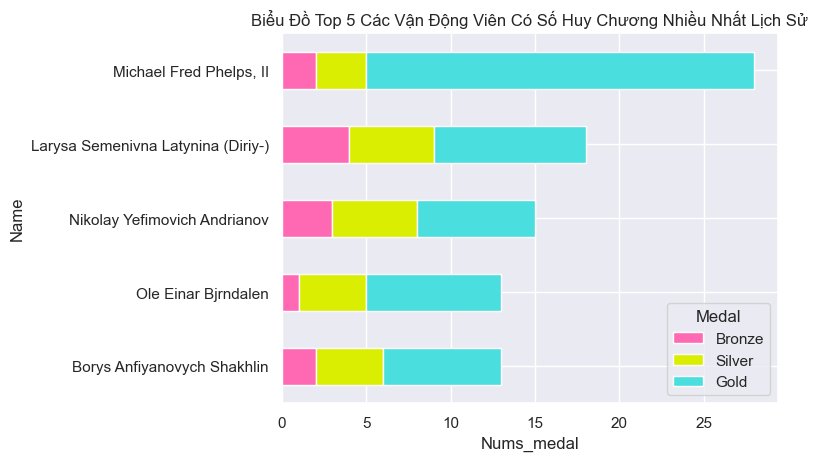

In [17]:
ax = num_medal_reward.plot.barh(color = ["#FF69B4","#DAEE01","#4ADEDE"], stacked = True)
plt.xlabel('Nums_medal')
plt.ylabel('Name')
plt.title('Biểu Đồ Top 5 Các Vận Động Viên Có Số Huy Chương Nhiều Nhất Lịch Sử')
plt.gca().invert_yaxis()
plt.show()

### 4.3. Quốc gia có thành tích tốt nhất qua các kỳ Olympic mùa hè?

Để trả lời cho câu hỏi này, ta sẽ tìm top 3 quốc gia có tổng số huy chương cao nhất và biểu diễn số lượng huy chương của các quốc gia này giành được qua các năm (Olympic mùa hè).

Đối với những môn thể thao đồng đội, tuy huy chương được trao cho từng thành viên trong đội, nhưng khi tính tổng số huy chương của quốc gia ta chỉ tính 1 huy chương cho một nội dung thi đấu.

- Đầu tiên ta sẽ tìm tên những môn thể thao đồng đội, nó sẽ là `Event` mà trong một năm có nhiều bộ huy chương được trao.



In [18]:
team_events = pd.pivot_table(ethlete_df,
                                      index = ['region', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'isWon',
                                      aggfunc = 'sum',
                                     fill_value = 0).reset_index()

team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()
team_sports

array(["Polo Men's Polo", "Rowing Men's Double Sculls",
       "Football Men's Football", "Basketball Men's Basketball",
       "Cycling Men's Madison", 'Sailing Mixed Multihull',
       "Hockey Men's Hockey", "Rugby Men's Rugby",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Cycling Men's Tandem Sprint, 2,000 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Equestrianism Men's Three-Day Event, Team",
       'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Tennis Men's Doubles",
       "Rowing Women's Coxless Pairs", "Sailing Men's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
     

- Qua quan sát ta thấy có 1 vài môn thể thao không phải là môn thể thao đồng đội nhưng vẫn được thêm vào đây. Nguyên nhân là do có tồn tại trường hợp trao nhiều hơn 1 huy chương vàng khi các vận động viên có cùng điểm số/ thời gian. Ta sẽ loại bỏ những môn thể thao này

In [19]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(remove_sports))

- Ta tạo thêm cột `isTeamSport` để ghi nhận việc `Event` đó có phải là môn thể thao đồng đội hay không.

In [20]:
ethlete_df['isTeamSport'] = np.where(ethlete_df['Event'].map(lambda x: x in team_sports), 1, 0)
ethlete_df['isTeamSport'] = ethlete_df['isTeamSport'].astype(bool)

- Tính tổng số huy chương của mỗi quốc gia cho môn thể thao cá nhân.

In [21]:
Total_Medal_Individual = ethlete_df.query("Season=='Summer' & isTeamSport==0 & isWon==1").value_counts(['region','Medal'])\
                .reset_index().pivot(index = 'region', columns = 'Medal', values = 0).fillna(0)
Total_Medal_Individual = Total_Medal_Individual[['Gold','Silver','Bronze']]

- Tính tổng số huy chương của mỗi quốc gia cho môn thể thao đồng đội.

In [22]:
temp = pd.DataFrame(ethlete_df.query("Season=='Summer' & isTeamSport==1 & isWon==1")[['Event','region','Medal']])\
        .drop_duplicates(keep='first')
Total_Medal_Team = temp.value_counts(['region','Medal'])\
                    .reset_index().pivot(index = 'region', columns = 'Medal', values = 0).fillna(0)
Total_Medal_Team = Total_Medal_Team[['Gold','Silver','Bronze']]

- Tạo dataframe tổng huy chương của từng quốc gia và sắp xếp.

In [23]:
Total_Medal=Total_Medal_Individual.add(Total_Medal_Team, fill_value=0)
Total_Medal['Total'] = Total_Medal['Gold'] + Total_Medal['Silver'] + Total_Medal['Bronze']
Total_Medal = Total_Medal.sort_values(by = 'Total', ascending = False).astype(int)
Total_Medal

Medal,Gold,Silver,Bronze,Total
region,,,,
USA,820,728,649,2197
Russia,494,432,442,1368
Germany,332,385,413,1130
UK,233,264,261,758
France,200,230,247,677
...,...,...,...,...
Kosovo,1,0,0,1
Montenegro,0,1,0,1
Macedonia,0,0,1,1


Bây giờ ta sẽ tìm top 3 quốc gia đạt được nhiều huy chương nhất các kỳ Olympics mùa hè và phân tích 1 chút về thành tích của 3 quốc gia đó qua các giai đoạn.

In [24]:
top3_countries = list(Total_Medal.head(3).index)
top3_countries

['USA', 'Russia', 'Germany']

Không quá bất ngờ khi top 3 dẫn đầu số huy chương Olympics đều là những cường quốc hàng đầu thế giới (Mỹ, Nga, Đức). Sau đây là thống kê số huy chương mà 3 quốc gia đó đã đạt được.

- Tính số huy chương của mỗi quốc gia này cho các môn thể thao cá nhân

In [25]:
medals_per_year_Individual = pd.pivot_table(ethlete_df.query("Season=='Summer' & isTeamSport==0 & isWon==1"),
                                  index   = 'Year',
                                  columns = 'region',
                                  values  = 'isWon' ,
                                  aggfunc = 'sum')[top3_countries]
medals_per_year_Individual.head()

region,USA,Russia,Germany
Year,,,
1896,18.0,NaN,8.0
1900,44.0,NaN,2.0
1904,189.0,NaN,15.0
1906,23.0,NaN,10.0
1908,39.0,3.0,9.0


- Tính số huy chương của mỗi quốc gia này cho các môn thể thao đồng đội.

In [26]:
temp = pd.DataFrame(ethlete_df.query("Season=='Summer' & isTeamSport==1 & isWon==1")\
                    [['Year','Event','region','Medal','isWon']]).drop_duplicates(keep='first')
medals_per_year_Team = pd.pivot_table(temp,
                                  index   = 'Year',
                                  columns = 'region',
                                  values  = 'isWon' ,
                                  aggfunc = 'sum')[top3_countries]
medals_per_year_Team.head()

region,USA,Russia,Germany
Year,,,
1896,2.0,NaN,6.0
1900,10.0,NaN,6.0
1904,44.0,NaN,1.0
1906,1.0,NaN,5.0
1908,7.0,NaN,4.0


- Tạo dataframe tổng huy chương và sắp xếp.

In [27]:
Total_Medal_per_year = medals_per_year_Individual.add(medals_per_year_Team, fill_value = 0)
Total_Medal_per_year = Total_Medal_per_year.sort_values(by = 'Year')
Total_Medal_per_year

region,USA,Russia,Germany
Year,,,
1896,20.0,NaN,14.0
1900,54.0,NaN,8.0
1904,233.0,NaN,16.0
1906,24.0,NaN,15.0
1908,46.0,3.0,13.0
1912,63.0,5.0,26.0
1920,95.0,NaN,NaN
1924,99.0,NaN,NaN
1928,56.0,NaN,39.0


Nhìn vào bảng kết quả, ta thấy dữ liệu của nước Nga bị thiếu rất nhiều trong khoảng thời gian từ kỳ Thế vận hội năm 1896 đến 1948 nhưng đây không phải là lỗi thiếu dữ liệu! Và đây là lí do:

Nga lần đầu tham dự Thế vận hội vào năm năm 1900 cũng như gửi vận động viên (VĐV) tới các kỳ Mùa hè 1908 và 1912. Sau Cách mạng Nga (1917) và tiếp đó là sự thành lập Liên bang Xô Viết năm 1922, sự góp mặt của các VĐV Nga bị gián đoạn cho tới 1952.

Vì vậy ta sẽ chỉ phân tích dữ liệu từ kỳ Thế vận hội năm 1952 trở về sau.

In [28]:
medals_per_year = Total_Medal_per_year[Total_Medal_per_year.index >= 1952]

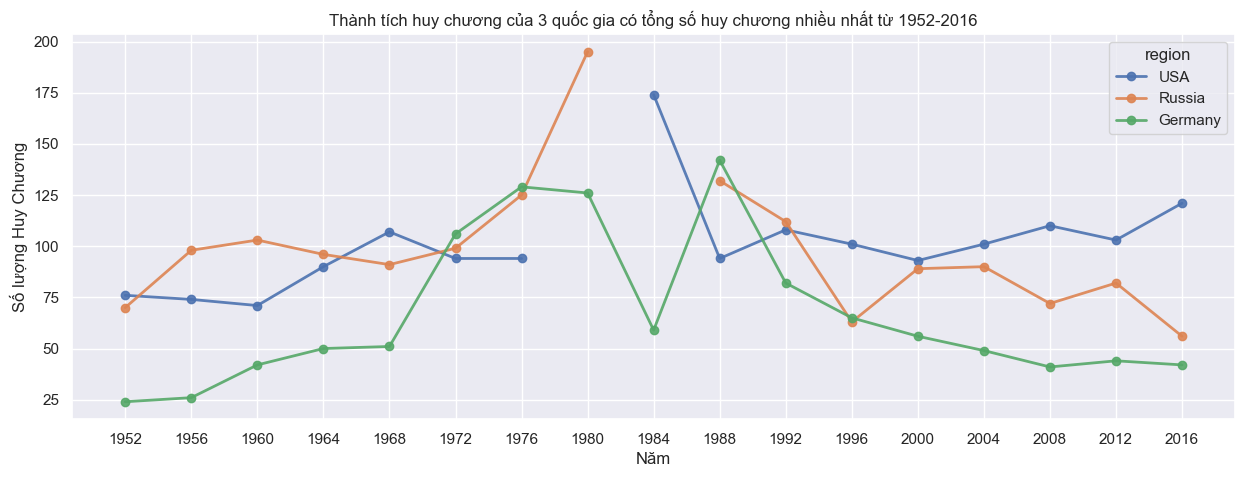

In [29]:
medals_per_year.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (15,5), linewidth = 2)
plt.xlabel('Năm')
plt.xticks(medals_per_year.index)
plt.ylabel('Số lượng Huy Chương')
plt.title('Thành tích huy chương của 3 quốc gia có tổng số huy chương nhiều nhất từ 1952-2016')
plt.show()

**Điểm giá trị bị thiếu của Mỹ vào năm 1980 không phải là lỗi thiếu dữ liệu!** 

Năm 1980, Hoa Kỳ kêu gọi tẩy chay Thế vận hội Olympic mùa hè ở Moscow để phản đối cuộc xâm lược Afghanistan của Liên Xô vào cuối năm 1979, có 64 quốc gia khác hưởng ứng cuộc tẩy chay này. Đây là lần đầu tiên và duy nhất mà Mỹ tẩy chay Olympics. 

Thế vận hội 1980 là Kỳ Thế vận hội đầu tiên mà Việt Nam tham dự với tư cách là một quốc gia thống nhất.

**Điểm giá trị bị thiếu của Nga vào năm 1984 cũng không có lỗi!**

08/05/1984, Liên Xô tuyên bố tẩy chay Olympics 1984. Việc tẩy chay Thế vận hội Mùa hè 1984 ở Los Angeles diễn ra sau 4 năm kể từ cuộc tẩy chay Thế vận hội Mùa hè 1980 ở Moscow do Hoa Kỳ lãnh đạo. Nguyên nhân chính được các quan chức Moscow đưa ra là vận động viên Liên Xô có thể sẽ không được an toàn trước các cuộc biểu tình và tấn công thù địch do phía Mỹ hậu thuẫn. Sau khi Liên Xô đưa ra tuyên bố "tẩy chay" Olympic 1984, 13 nước có quan hệ thân thiết với quốc gia xã hội chủ nghĩa lớn nhất thế giới cũng đưa ra các thông báo tương tự và từ chối tham dự.

Có vấn đề gì bất cập không khi lần mà 2 quốc gia này giành được nhiều huy chương nhất trong một Kỳ thế vận hội cũng là là lần mà họ làm chủ nhà.

**Với những mốc thời gian còn lại:**

Từ những năm 1952 đến 1976, số lượng huy chương giành được của các quốc gia Mỹ, Nga, Đức gần như tăng dần qua các năm.

Từ những năm 1996 đến 2016, Mỹ luôn dẫn đầu về thổng số lượng huy chương trong  một Kỳ thế vận hội, trong khi Nga thì có xu hướng giảm, Đức thì không ổn định.

### 4.4. Thành tích của Thể thao Việt Nam trong lịch sử tham dự Olympic?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Tạo Dataframe chứa dữ liệu gồm số vận động viên Việt Nam tham dự, số huy chương đạt được qua các năm

Đầu tiên ta kiểm tra xem thể thao Việt Nam có từng đạt Huy Chương các môn đồng đội nào không.

In [30]:
ethlete_df.query("region=='Vietnam' & isWon==1 & isTeamSport==1")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,isWon,isTeamSport


Từ đây ta thấy Việt Nam chưa từng đạt huy chương các môn thể thao đồng đội nên ta có thể tính toán như bình thường từ ethlete_df

In [31]:
temp  = pd.DataFrame(ethlete_df.query("region=='Vietnam'"))
df_vn = pd.DataFrame(temp.groupby(['Year', 'Season'])['Name'].count().rename('number of athletes').reset_index())

temp  = temp.value_counts(['Year', 'Medal']).reset_index()\
        .pivot_table(index = 'Year', columns = 'Medal', values = 0,aggfunc = 'sum')

df_vn = df_vn.merge(temp, on = 'Year', how = 'left')

- Thêm cột huy chương bị thiếu

In [32]:
dest_cols = ['Year', 'number of athletes', 'Gold', 'Silver', 'Bronze']
missing_cols = list(set(dest_cols).difference(set(df_vn.columns)))
missing_df = pd.DataFrame(columns = missing_cols)
df_vn = pd.concat([df_vn, missing_df], axis = 1)

Việt Nam là quốc gia không có mùa đông băng tuyết, vận động viên sẽ không có đủ điều kiện luyện tập, thường phải luyện tập ở nước ngoài. Vì những điều kiện khó khăn đó cho nên từ 1952 đến 2016 Việt Nam chưa từng tham dự Olympic mùa Đông.

Vì lý do kinh tế và chính trị, Việt Nam không tham dự hai kỳ Olympic mùa Hè 1976 và 1984. 

- Ta thêm 2 dòng bị thiếu là 2 năm mà Việt Nam không tham dự.

In [33]:
df_vn.loc[df_vn.shape[0]] = {'Year':1976, 'Season':'Summer'}
df_vn.loc[df_vn.shape[0]] = {'Year':1984, 'Season':'Summer'}

Việt Nam lần đầu tham dự Thế vận hội với tư cách là một quốc gia thống nhất là vào năm 1980. Cho nên ta sẽ chỉ phân tích dữ liệu từ năm 1980.

In [34]:
df_vn = df_vn[df_vn['Year'] >= 1980].set_index('Year').sort_index()
df_vn

,Season,number of athletes,Gold,Silver,Bronze
Year,,,,,
1980,Summer,38.0,NaN,NaN,NaN
1984,Summer,NaN,NaN,NaN,NaN
1988,Summer,12.0,NaN,NaN,NaN
1992,Summer,10.0,NaN,NaN,NaN
1996,Summer,6.0,NaN,NaN,NaN
2000,Summer,7.0,NaN,1.0,NaN
2004,Summer,11.0,NaN,NaN,NaN
2008,Summer,18.0,NaN,1.0,NaN
2012,Summer,24.0,NaN,NaN,NaN


Ta vẽ biểu đồ thống kê cho số lượng vận động viên Việt Nam từ 1980-2016:

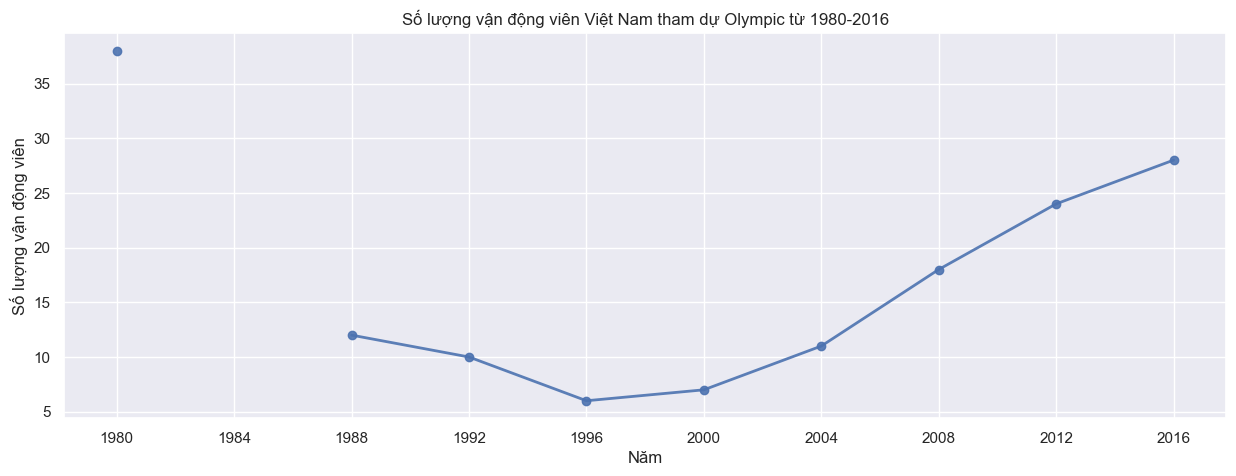

In [35]:
df_vn['number of athletes'].plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (15,5), linewidth = 2)
plt.xlabel('Năm')
plt.xticks(df_vn.index)
plt.ylabel('Số lượng vận động viên')
plt.title('Số lượng vận động viên Việt Nam tham dự Olympic từ 1980-2016')
plt.show()

Một nhận xét ban đầu là số lượng vận động viên Việt Nam giảm từ 1988 đến 1996, sau đó lại tăng liên tục từ năm 1996 đến 2016. Ta tiếp tục quan sát biểu đồ về số huy chương mà các vận động viên Việt Nam đã đạt được:

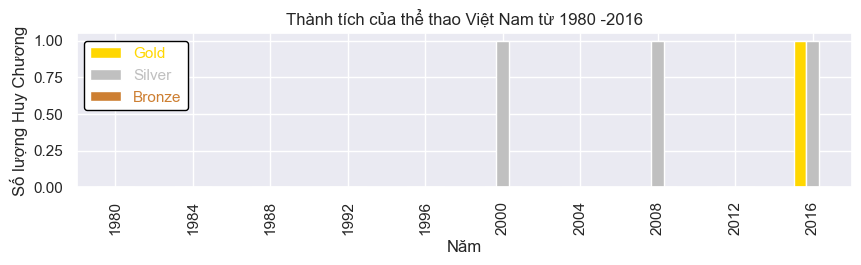

In [36]:
df_vn.plot(y = ["Gold", "Silver",'Bronze'], kind = "bar", figsize = (10, 2), color=['gold','silver','#CD7F32'])
sns.set(rc = {'axes.facecolor':'#AEDC82'})
plt.xlabel('Năm')
plt.ylabel('Số lượng Huy Chương')
plt.title('Thành tích của thể thao Việt Nam từ 1980 -2016')
plt.legend(facecolor = 'white', framealpha = 1, labelcolor=['gold','silver','#CD7F32'], edgecolor = 'black')
plt.show()

Tổng số huy chương mà Việt Nam đã giành được:

In [37]:
df_vn[['Gold','Silver','Bronze']].sum().sum()

4.0

Các vận động viên giành được huy chương:

In [38]:
ethlete_df.query("region=='Vietnam' & isWon==1")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,isWon,isTeamSport
96703,48962,Hong Anh Tun,M,23.0,152.0,56.0,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Bantamweight,Silver,Vietnam,True,False
96709,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,True,False
96710,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,Vietnam,True,False
242905,121646,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,Vietnam,True,False


Gần 4 thập kỷ trôi qua từ lần đầu tiên góp mặt tại các kỳ Olympic, thể thao Việt Nam mới có 4 VĐV đoạt huy chương, trong đó xạ thủ bắn súng Hoàng Xuân Vinh là người duy nhất sở hữu HCV.

- Olympic Moscow (Nga) 1980: Đoàn TTVN tham dự với 38 VĐV, không giành huy chương.

- Olympic Seoul (Hàn Quốc) 1988: Tham dự với 12 VĐV, không giành huy chương.

- Olympic Barcelona (Tây Ban Nha) 1992: Tham dự với 10 VĐV, không giành huy chương.

- Olympic Atlanta (Mỹ) 1996: Tham dự với 6 VĐV, không giành huy chương.

- Olympic Sydney (Australia) 2000: Tham dự với 7 VĐV, lần đầu tiên có tên trên bảng tổng sắp huy chương, với tấm HCB của nữ võ sĩ taekwondo Trần Hiếu Ngân ở hạng cân 57kg.

- Olympic Athens (Hy Lạp) 2004: Tham dự với 11 VĐV, không giành huy chương.

- Olympic Bắc Kinh (Trung Quốc) 2008: Tham dự với 18 VĐV, giành 1 HCB nhờ công của lực sỹ cử tạ Hoàng Anh Tuấn (hạng 56 kg nam).

- Olympic London (Anh) 2012: Tham dự với 24 VĐV, giành 1 HCĐ sau khi Trần Lê Quốc Toàn được đôn từ hạng tư nội dung 56kg lên vị trí thứ ba, thế chỗ VĐV của Azerbajan bị tước huy chương vì doping.

- Olympic Rio (Brazil) 2016: Tham dự với 28 VĐV, trong đó xạ thủ bắn súng Hoàng Xuân Vinh xuất sắc giành 1 HCV nội dung 10m súng ngắn hơi và 1 HCB nội dung 50m súng ngắn.

### 4.5. Trong một thế vận hội: ai là người tham gia thi nhiều nội dung nhất, ai là người giành nhiều huy chương nhất?

**Để trả lời cho câu hỏi trên ta làm như sau:**

- Bước 1: Tạo dict `games_id` chứa thông tin của các vận động viên theo từng thế vận hội. Cụ thể `games_id` có key là tên của thế vận hội, value là danh sách thông tin của vận động viên tham gia thế vận hội đó, trong đó thông tin của một vận động viên gồm : 'ID', 'Name', 'Num of attend', 'Num of medal'


- Bước 2: Tạo 2 dict `games_maxAttend` và `games_maxMedal`, trong đó:
    - `games_maxAttend`: có key là tên của thế vận hội, value là số nội dung tham gia của vận động viên có số nội dung tham gia nhiều nhất thế vận hội năm đó.
    - `games_maxMedal`: có key là tên của thế vận hội, value là số huy chương của vận động viên có số huy chương nhiều nhất thế vận hội năm đó.


- Bước 3: Từ `games_maxAttend` ta tìm được một danh sách các key có value lớn nhất trong `games_maxAttend`. Ta lưu danh sách key vào biến `game_most_attend`, value lớn nhất vào biến `num_most_attend`. Tương tự với `games_maxMedal`, lưu danh sách key vào biến `game_most_medal`, value lớn nhất vào biến `num_most_medal`.


- Bước 4: Tạo dict `athlete_most_attend` chứa thông tin của vận động viên tham gia nhiều nội dung nhất trong một thế vận hội. Cụ thể `athlete_most_attend` có key là tên thế vận hội thuộc `game_most_attend`, value là danh sách các vận động viên có số lần tham gia thế vận hội đó = `num_most_attend`. Tương tự, ta tạo dict `athlete_most_medal`

Tạo dict `games_id` chứa thông tin của các vận động viên theo từng thế vận hội. Cụ thể `games_id` có key là tên của thế vận hội, value là danh sách thông tin của vận động viên tham gia thế vận hội đó, trong đó thông tin của một vận động viên gồm : 'ID', 'Name', 'Num of attend', 'Num of medal'

In [39]:
games_id = {}

for name1, group1 in ethlete_df.groupby('Games'):
    games_id[name1] = []
    for name2, group2 in group1.groupby('ID'):
        games_id[name1].append({
            'ID': name2,
            'Name': group2['Name'].iloc[0],
            'Num of attend': len(group2),
            'Num of medal': group2['isWon'].sum()
        })
    
#games_id

Tạo 2 dict `games_maxAttend` và `games_maxMedal`, trong đó:
    - `games_maxAttend`: có key là tên của thế vận hội, value là số nội dung tham gia của vận động viên có số nội dung tham gia nhiều nhất thế vận hội năm đó.
    - `games_maxMedal`: có key là tên của thế vận hội, value là số huy chương của vận động viên có số huy chương nhiều nhất thế vận hội năm đó.

In [40]:
games_maxAttend = {}
games_maxMedal = {}
for game in games_id:
    games_maxAttend[game] = max([athlete['Num of attend'] for athlete in games_id[game]])
    games_maxMedal[game] = max([athlete['Num of medal'] for athlete in games_id[game]])
    
print(games_maxAttend)
print(games_maxMedal)

{'1896 Summer': 12, '1900 Summer': 8, '1904 Summer': 10, '1906 Summer': 12, '1908 Summer': 7, '1912 Summer': 12, '1920 Summer': 15, '1924 Summer': 9, '1924 Winter': 6, '1928 Summer': 7, '1928 Winter': 4, '1932 Summer': 9, '1932 Winter': 4, '1936 Summer': 8, '1936 Winter': 5, '1948 Summer': 8, '1948 Winter': 6, '1952 Summer': 8, '1952 Winter': 4, '1956 Summer': 8, '1956 Winter': 4, '1960 Summer': 8, '1960 Winter': 4, '1964 Summer': 8, '1964 Winter': 4, '1968 Summer': 8, '1968 Winter': 5, '1972 Summer': 8, '1972 Winter': 4, '1976 Summer': 8, '1976 Winter': 5, '1980 Summer': 8, '1980 Winter': 5, '1984 Summer': 8, '1984 Winter': 5, '1988 Summer': 10, '1988 Winter': 5, '1992 Summer': 8, '1992 Winter': 5, '1994 Winter': 5, '1996 Summer': 8, '1998 Winter': 5, '2000 Summer': 8, '2002 Winter': 6, '2004 Summer': 8, '2006 Winter': 5, '2008 Summer': 8, '2010 Winter': 6, '2012 Summer': 8, '2014 Winter': 6, '2016 Summer': 8}
{'1896 Summer': 6, '1900 Summer': 5, '1904 Summer': 6, '1906 Summer': 5, '1

Từ `games_maxAttend` ta tìm được một danh sách các key có value lớn nhất trong `games_maxAttend`. Ta lưu danh sách key vào biến `game_most_attend`, value lớn nhất vào biến `num_most_attend`. Tương tự với `games_maxMedal`, lưu danh sách key vào biến `game_most_medal`, value lớn nhất vào biến `num_most_medal`.

In [41]:
game_most_attend = [game for game in games_maxAttend if games_maxAttend[game] == max(games_maxAttend.values())]
game_most_medal = [game for game in games_maxMedal if games_maxMedal[game] == max(games_maxMedal.values())]
print(game_most_attend)
print(game_most_medal)

['1920 Summer']
['1980 Summer', '2004 Summer', '2008 Summer']


In [42]:
num_most_attend = games_maxAttend[game_most_attend[0]]
num_most_medal = games_maxMedal[game_most_medal[0]]
print(num_most_attend)
print(num_most_medal)

15
8


Tạo dict `athlete_most_attend` chứa thông tin của vận động viên tham gia nhiều nội dung nhất trong một thế vận hội. Cụ thể `athlete_most_attend` có key là tên thế vận hội thuộc `game_most_attend`, value là danh sách các vận động viên có số lần tham gia thế vận hội đó = `num_most_attend`. Tương tự, ta tạo dict `athlete_most_medal`

In [43]:
athlete_most_attend = {}
for game in game_most_attend:
    athlete_most_attend[game] = [athlete for athlete in games_id[game] if athlete['Num of attend'] == num_most_attend]
    
athlete_most_attend

{'1920 Summer': [{'ID': 68189,
   'Name': 'Willis Augustus Lee, Jr.',
   'Num of attend': 15,
   'Num of medal': 7}]}

In [44]:
athlete_most_medal = {}
for game in game_most_medal:
    athlete_most_medal[game] = [athlete for athlete in games_id[game] if athlete['Num of medal'] == num_most_medal]
    
athlete_most_medal

{'1980 Summer': [{'ID': 28790,
   'Name': 'Aleksandr Nikolayevich Dityatin',
   'Num of attend': 8,
   'Num of medal': 8}],
 '2004 Summer': [{'ID': 94406,
   'Name': 'Michael Fred Phelps, II',
   'Num of attend': 8,
   'Num of medal': 8}],
 '2008 Summer': [{'ID': 94406,
   'Name': 'Michael Fred Phelps, II',
   'Num of attend': 8,
   'Num of medal': 8}]}

**Trả lời câu hỏi:**

Từ `athlete_most_attend` và `athlete_most_medal` ta đã có được câu trả lời nhưng để hiển thị câu trả lời rõ ràng hơn ta code thêm như sau:

- Trong một thế vận hội, người tham gia thi nhiều nội dung nhất là:

In [45]:
most_attend_info = {'ID': [], 'Name': [], 'Thế vận hội': [], 'Số nội dung tham gia': [], 'Số huy chương đạt được': []}
for key, values in athlete_most_attend.items():
    for value in values:
        most_attend_info['ID'].append(value['ID'])
        most_attend_info['Name'].append(value['Name'])
        most_attend_info['Thế vận hội'].append(key)
        most_attend_info['Số nội dung tham gia'].append(value['Num of attend'])
        most_attend_info['Số huy chương đạt được'].append(value['Num of medal'])     
    
pd.DataFrame(most_attend_info)

,ID,Name,Thế vận hội,Số nội dung tham gia,Số huy chương đạt được
0,68189,"Willis Augustus Lee, Jr.",1920 Summer,15,7


- Trong một thế vận hội, người đạt được nhiều huy chương nhất là:

In [46]:
most_medal_info = {'ID': [], 'Name': [], 'Thế vận hội': [], 'Số nội dung tham gia': [], 'Số huy chương đạt được': []}
for key, values in athlete_most_medal.items():
    for value in values:
        most_medal_info['ID'].append(value['ID'])
        most_medal_info['Name'].append(value['Name'])
        most_medal_info['Thế vận hội'].append(key)
        most_medal_info['Số nội dung tham gia'].append(value['Num of attend'])
        most_medal_info['Số huy chương đạt được'].append(value['Num of medal'])     
    
pd.DataFrame(most_medal_info)

,ID,Name,Thế vận hội,Số nội dung tham gia,Số huy chương đạt được
0,28790,Aleksandr Nikolayevich Dityatin,1980 Summer,8,8
1,94406,"Michael Fred Phelps, II",2004 Summer,8,8
2,94406,"Michael Fred Phelps, II",2008 Summer,8,8


### 4.6. Trong những năm gần đây (từ khi Olympic mùa hè và mùa đông bắt đầu xen kẽ nhau), mỗi quốc gia đăng cai tổ chức liệu có lợi thế chủ nhà hay không ?

Ta sẽ phân tích bằng cách so sánh số huy chương mà nước chủ nhà đạt được tại 3 thời điểm:
- Tại thế vận hội mà nước chủ nhà tham gia gần nhất trước khi đăng cai thế vận hội đang xét.
- Tại thế vận hội mà nước chủ nhà đăng cai.
- Tại thế vận hội mà nước chủ nhà tham gia gần nhất sau khi đăng cai thế vận hội đang xét. 

Để trả lời cho câu hỏi này, trước tiên ta sẽ tìm những thành phố đã đăng cai Olympic từ năm 1994, sau đó tìm ra những nước chủ nhà tương ứng.

In [47]:
recent_years_df = ethlete_df[ethlete_df['Year'] >= 1994]
recent_years_df[['Year', 'City']].drop_duplicates().sort_values('Year').reset_index(drop = True)

,Year,City
0,1994,Lillehammer
1,1996,Atlanta
2,1998,Nagano
3,2000,Sydney
4,2002,Salt Lake City
5,2004,Athina
6,2006,Torino
7,2008,Beijing
8,2010,Vancouver
9,2012,London


Ngoài tên những thành phố nổi tiếng đã quá quen thuộc, ta thấy có những cái tên lạ như `Athina` hay `Torino`. Đây không phải những thành phố lạ lẫm đâu. Đó chính là 2 thành phố `Athens` ở Hy Lạp và `Turin` ở Ý (`Athina` là `Athens` phát âm trong tiếng Hy Lạp, còn `Torino` là phát âm của `Turin` trong tiếng Ý). Ta có thể sửa lại chúng theo tiếng Anh trước khi tiếp tục phân tích.

In [48]:
recent_years_df['City'].replace(['Athina', 'Torino'], ['Athens', 'Turin'], inplace = True)

Tiếp theo, ta sẽ dựa trên tên những thành phố này để đổi sang tên quốc gia tương ứng.

In [49]:
cities_countries = {'Lillehammer': 'Norway',
                  'Atlanta': 'USA',
                  'Nagano': 'Japan',
                  'Sydney': 'Australia',
                  'Salt Lake City': 'USA',
                  'Athens': 'Greece',
                  'Turin': 'Italy',
                  'Beijing': 'China',
                  'Vancouver': 'Canada',
                  'London': 'UK',
                  'Sochi': 'Russia',
                  'Rio de Janeiro': 'Brazil'}
#Thêm trường 'Host_Country' với đất nước tương ứng thành phố ở trên
recent_years_df['Host_Country'] = recent_years_df['City'].map(cities_countries)
recent_years_df.loc[:, ['Year', 'Host_Country']].drop_duplicates().sort_values('Year').reset_index(drop = True)

,Year,Host_Country
0,1994,Norway
1,1996,USA
2,1998,Japan
3,2000,Australia
4,2002,USA
5,2004,Greece
6,2006,Italy
7,2008,China
8,2010,Canada
9,2012,UK


Sau đó, ta sẽ tính số huy chương cá nhân và đồng đội rồi gộp lại để ra số huy chương mà các nước đã đạt được gần đây.

In [50]:
#Số huy chương cá nhân gần đây
medals_recent_years_Individual = pd.pivot_table(recent_years_df.query("isTeamSport==0 & isWon==1"),
                                  index   = 'Year',
                                  columns = 'region',
                                  values  = 'isWon' ,
                                  aggfunc = 'sum')[cities_countries.values()]

#Số huy chương đồng đội gần đây
Team_Drop_Duplicate_Medals = pd.DataFrame(recent_years_df.query("isTeamSport==1 & isWon==1")\
                    [['Year','Event','region','Medal','isWon']]).drop_duplicates(keep = 'first')
medals_recent_years_Team = pd.pivot_table(Team_Drop_Duplicate_Medals,
                                  index   = 'Year',
                                  columns = 'region',
                                  values  = 'isWon' ,
                                  aggfunc = 'sum')[cities_countries.values()]

#Thay thế các np.nan thành 0 (số huy chương)
np.nan_to_num(medals_recent_years_Individual, 0)
np.nan_to_num(medals_recent_years_Team, 0)

#Tổng số huy chương gần đây của các nước chủ nhà
Total_Medal_recent_year = medals_recent_years_Individual.add(medals_recent_years_Team)
Total_Medal_recent_year = Total_Medal_recent_year.sort_values(by = 'Year')
Total_Medal_recent_year

region,Norway,USA,Japan,Australia,USA,Greece,Italy,China,Canada,UK,Russia,Brazil
Year,,,,,,,,,,,,
1994,23.0,13.0,5.0,1.0,13.0,0.0,20.0,3.0,13.0,2.0,23.0,0.0
1996,7.0,101.0,14.0,41.0,101.0,8.0,35.0,51.0,22.0,15.0,63.0,15.0
1998,22.0,13.0,10.0,1.0,13.0,0.0,10.0,8.0,15.0,1.0,18.0,0.0
2000,10.0,93.0,18.0,58.0,93.0,13.0,34.0,58.0,14.0,28.0,89.0,12.0
2002,24.0,34.0,2.0,2.0,34.0,0.0,13.0,8.0,17.0,2.0,13.0,0.0
2004,6.0,101.0,37.0,50.0,101.0,16.0,32.0,64.0,12.0,30.0,90.0,10.0
2006,19.0,25.0,1.0,2.0,25.0,0.0,11.0,11.0,24.0,1.0,22.0,0.0
2008,9.0,110.0,25.0,46.0,110.0,4.0,27.0,100.0,19.0,48.0,72.0,16.0
2010,23.0,37.0,5.0,3.0,37.0,0.0,5.0,11.0,26.0,1.0,15.0,0.0


Sau đó lấy ra số huy chương mà các nước chủ nhà đạt được trong năm đăng cai cũng như các kỳ Olympic 2 năm trước và sau đó.

In [51]:
Medal_Host_Year = pd.DataFrame(index = Total_Medal_recent_year.columns)
Medal_Host_Year['Year'] = Total_Medal_recent_year.index
Medal_Host_Year['Last_2_Year'] = [np.nan] + pd.Series(np.diag(Total_Medal_recent_year, 1)).tolist()
Medal_Host_Year['Host_Year'] = pd.Series(np.diag(Total_Medal_recent_year)).tolist()
Medal_Host_Year['Next_2_Year'] = pd.Series(np.diag(Total_Medal_recent_year, -1)).tolist() + [np.nan]
Medal_Host_Year

,Year,Last_2_Year,Host_Year,Next_2_Year
region,,,,
Norway,1994,NaN,23.0,7.0
USA,1996,13.0,101.0,13.0
Japan,1998,14.0,10.0,18.0
Australia,2000,1.0,58.0,2.0
USA,2002,93.0,34.0,101.0
Greece,2004,0.0,16.0,0.0
Italy,2006,32.0,11.0,27.0
China,2008,11.0,100.0,11.0
Canada,2010,19.0,26.0,18.0


Cuối cùng, ta vẽ biểu đồ thống kê cho số huy chương:

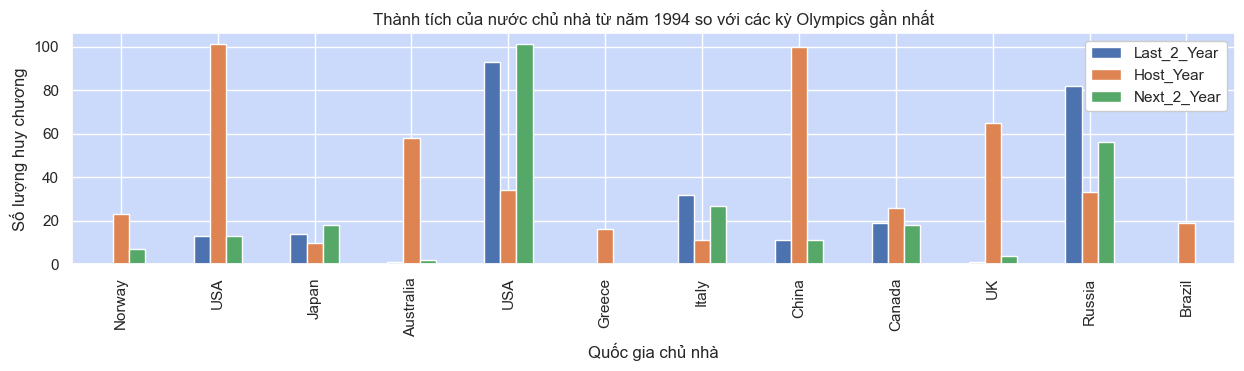

In [52]:
sns.set(rc = {'axes.facecolor':'#CBDAFA'})
Medal_Host_Year[['Last_2_Year','Host_Year','Next_2_Year']].plot(kind = "bar", figsize = (15, 3))
plt.legend(facecolor = 'white', framealpha = 1, loc = 'best')
plt.xlabel('Quốc gia chủ nhà')
plt.ylabel('Số lượng huy chương')
plt.title('Thành tích của nước chủ nhà từ năm 1994 so với các kỳ Olympics gần nhất')
plt.show()

- Nhìn vào thống kê trên, ta có thể thấy được rằng đa số các nước chủ nhà đều tận dụng rất tốt lợi thế chủ nhà và có được số huy chương xấp xỉ, thậm chí còn vượt trội rất nhiều hơn so với 2 kỳ Olympic gần nhất (hơi đáng ngờ thật, không biết do tận dụng tốt thật hay có sự thiên vị gì ở đây không). 
- Tuy vậy, vẫn có 1 vài trường hợp đặc biệt như Mỹ (Olympic 2002) (mặc dù Mỹ đã làm rất tốt ở kỳ chủ nhà Olympic 6 năm trước đó), Nga (Olympic 2014) và Ý (2006) có số huy chương thấp hơn rất nhiều. 
- Điều này cũng khá dễ hiểu vì những kỳ Olympic này đều diễn ra vào mùa đông. So với các kỳ Olympic mùa hè, các môn thể thao mùa đông thường khắc nghiệt hơn, đòi hỏi vận động viên·phải đã quen với môi trường khí hậu (không phù hợp với các nước nhiệt đới và cận nhiệt đới) cũng như khán giả rất khó để theo dõi, quan sát. Bên cạnh đó, số tiền mà nước chủ nhà bỏ ra để đầu tư cho các môn thể thao mùa đông là hàng triệu đô (gấp nhiều lần so với mùa hè). Vì vậy, số nước có thể tham gia cũng như số môn thể thao và số huy chương sẽ hạn chế đi đáng kể. Đó cũng là lý do tại sao người ta lại ưa chuộng và quan tâm đến các Thế vận hội mùa hè hơn rất nhiều so với các kỳ Olympic mùa đông. Để kiểm tra điều này, ta có thể xem qua thống kê số môn thể thao mùa đông so với mùa hè cũng như số vận động viên tham gia:

In [53]:
def SeasonCalculate(season):
    print(season + ' Olympics:')
    print("Sports: " , ethlete_df.query(f"Season == '{season}'")['Sport'].drop_duplicates().count())
    print("Athletes: " , ethlete_df.query(f"Season == '{season}'")['ID'].drop_duplicates().count())
SeasonCalculate('Summer')
SeasonCalculate('Winter')

Summer Olympics:
Sports:  52
Athletes:  116776
Winter Olympics:
Sports:  17
Athletes:  18958


Thật là 1 sự áp đảo toàn diện của các kỳ Olympics mùa hè!

### 4.7 Mối quan hệ giữa số nội dung tham gia và số huy chương đạt được của mỗi quốc gia qua các kỳ thế vận hội.

**Để trả lời cho câu hỏi trên ta làm như sau:**

- Bước 1: Tính số nội dung tham gia và số huy chương đạt được của mỗi quốc gia qua các kỳ thế vận hội.
- Bước 2: Trực quan hóa số nội dung tham gia và số huy chương đạt được.
- Bước 3: Sử dụng mô hình hồi quy để tìm ra mối quan hệ giữa 2 yếu tố trên.
- Bước 4: Kết luận.

Tính số nội dung tham gia và số huy chương đạt được của mỗi quốc gia qua các kỳ thế vận hội.

In [54]:
olympics, countries, isWons = [], [], []
for name1, group1 in ethlete_df[['Games', 'region', 'Event', 'isWon', 'isTeamSport']].groupby('Games'):
    for name2, group2 in group1.groupby('region'):
        olympics.append(name1)
        countries.append(name2)

        isWons_individual = group2[group2['isTeamSport'] == False]['isWon'].to_list()
        isWons_team = group2[group2['isTeamSport'] == True][['Event', 'isWon']].drop_duplicates()['isWon'].to_list()
        
        isWons.append(isWons_individual + isWons_team)

olympic_achievements = pd.DataFrame({'Olympics': olympics, 'Countries': countries})
olympic_achievements['Number of events'] = pd.Series(isWons).apply(len)
olympic_achievements['Number of medals'] = pd.Series(isWons).apply(sum)
olympic_achievements

,Olympics,Countries,Number of events,Number of medals
0,1896 Summer,Australia,5,3
1,1896 Summer,Austria,8,5
2,1896 Summer,Denmark,15,6
3,1896 Summer,France,26,11
4,1896 Summer,Germany,60,13
...,...,...,...,...
3781,2016 Summer,"Virgin Islands, British",4,0
3782,2016 Summer,"Virgin Islands, US",7,0
3783,2016 Summer,Yemen,3,0
3784,2016 Summer,Zambia,7,0


Trực quan hóa số nội dung tham gia và số huy chương đạt được.

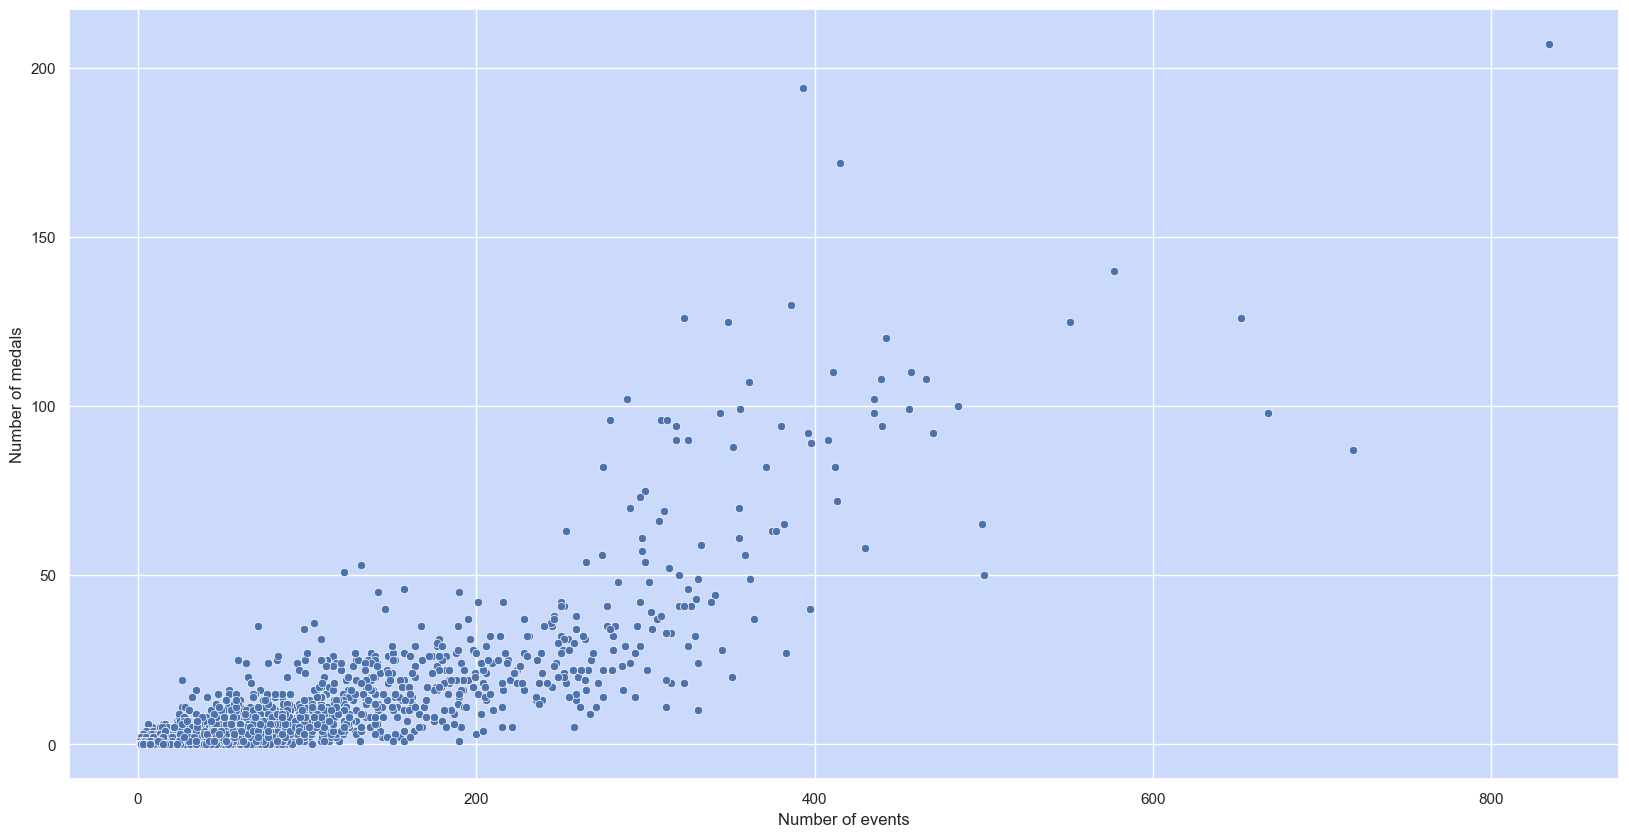

In [55]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x='Number of events', y='Number of medals', data=olympic_achievements)
plt.show()

Sử dụng mô hình hồi quy để tìm ra mối quan hệ giữa 2 yếu tố trên.

Từ đồ thị ở trên ta thấy mô hình hồi quy phù hợp là tuyến tính.

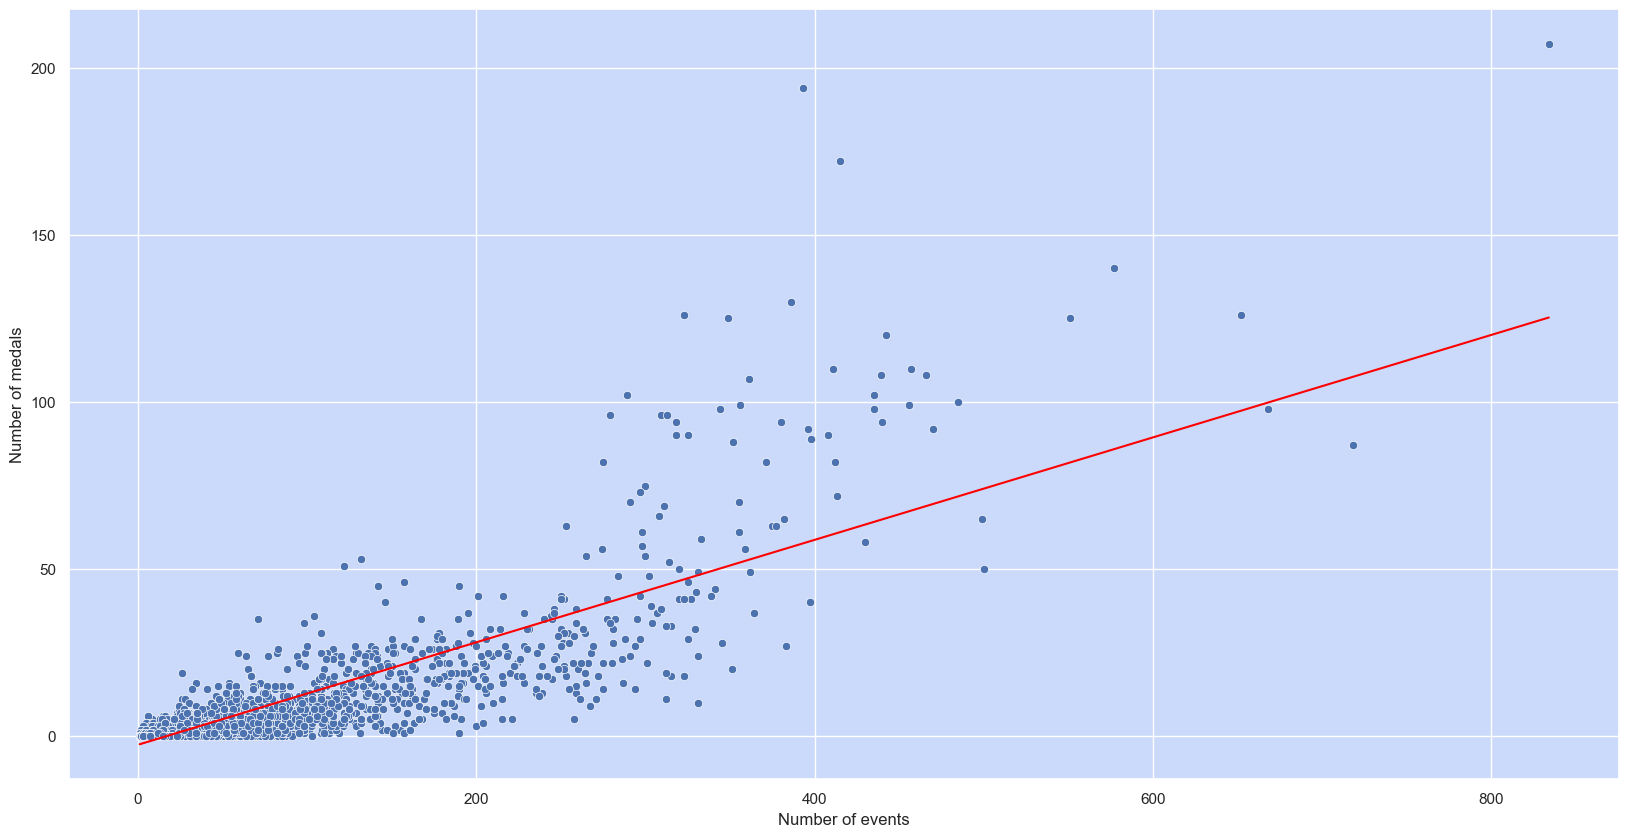

In [56]:
slope, intercept, r, p, std_err = stats.linregress(
    olympic_achievements['Number of events'],
    olympic_achievements['Number of medals']
)

def regression_line(x):
    return slope * x + intercept

plt.figure(figsize = (20, 10))

sns.scatterplot(x = 'Number of events', y = 'Number of medals', data = olympic_achievements)
sns.lineplot(
    x = olympic_achievements['Number of events'],
    y = olympic_achievements['Number of events'].apply(regression_line),
    color = 'red'
)

plt.show()

Kết luận

Mối quan hệ giữa số nội dung tham gia và số huy chương đạt được của mỗi quốc gia qua các kỳ thế vận hội là mối quan hệ tuyến tính, tuân theo công thức sau đây:

In [57]:
print(f'[Number of medals] = ({slope})*[Number of events] + ({intercept})')

[Number of medals] = (0.1532501045391683)*[Number of events] + (-2.558322659649371)
